<a href="https://colab.research.google.com/github/wavallejol/Entropy/blob/main/Probabilidad%26Entrop%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

üî¥  üî¥  üî¥ ‚¨áÔ∏è **Primero importaremos las librerias que utilizaremos** ‚¨áÔ∏è üî¥  üî¥  üî¥

In [1]:
from random import *
from pylab import *
from math import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, factorial

# **Sesi√≥n 8. Entrop√≠a y Probabilidad**
***William Vallejo***
# **Objetivos**
 
1.   Apropiar conceptos basicos de probabilidad utilizando Google Colabs.
2.   Entender la relaci√≥n entre entrop√≠a y probabilidad
3.   Verificar la dependencia de la entrop√≠a con el tiempo y el numero de part√≠culas que componen el sistema.
---



# **1. Introducci√≥n**

<div align="justify">

Normalmente, la temperatura se interpreta f√°cilmente como cierta medida de la energ√≠a molecular media y la energ√≠a interna se interpreta como la energ√≠a molecular total. Sin embargo, la interpretaci√≥n de la  <a href="https://en.wikipedia.org/wiki/Entropy"> Entrop√≠a</a> puede llegar a ser complicada por el grado de abstracci√≥n que normalmente presenta el formalismo matem√°tico. Es as√≠ que a pesar de realizar el calculo del cambio de ŒîS en varios procesos, es com√∫n que no se logre disponer de una imagen clara de la naturaleza fisicoqu√≠mica de la entrop√≠a. Aunque la entrop√≠a no admite una interpretaci√≥n tan sencilla como la temperatura o la energ√≠a interna, en esta experiencia se tratar√° de abordar su significado por medio de una simulaci√≥n apoyada en conceptos probabil√≠sticos (levine, 1996).

</div>


# **Actividad 1. El n√∫mero de la suerte**

<div align="justify">

En el juego de los dados normalmente apostamos un numero entre (1-12), ¬øcual es el n√∫mero que tiene mayor probabilidad de repetirse despu√©s de una serie de lanzamientos?. Podr√≠amos resolver esta pregunta realizando el lanzamiento de un par de dados y verificar el resultado para tabular las respuestas y verificar cualquiera el resultado que mas se repetir√≠a. ¬øCuantos lanzamientos deber√≠amos realizar para estar seguro? 10, 100, 1000, 2000, 5000 10000, 20000, 30000. Se decidieramos que realizar üò±üò±üò± 30000 üò±üò±üò± lanzamientos ser√≠a adecuado, esta tarea seria muy tediosa y repetitiva üôàüôàüôàüôà. Afortunadamente contamos con nuestras computadoras para realizar este tipo de tareas. 

A continuaci√≥n, encontrar√°s una rutina que muestra el resultado que obtendr√≠as despu√©s de lanzar dos dados un numero definido de veces. Ejecuta la rutina en la celda de c√≥digo que encontrar√°s a continuaci√≥n: 

Podr√°s elegir el n√∫mero de lanzamientos que deseas realizar (elige un numero entre 1 y 30000) se  elige este limite para garantizar que el calculo no tomara mas de 40 segundos). Veamos a como afecta el resultado obtenido el numero lanzamientos que realizamos. 

(i) Corre la simulaci√≥n y elige 10 lanzamientos, toma un pantallazo de la curva, luego vuelve a correr la rutina y a ahora (ii) elige 100 lanzamientos y toma un pantallazo de la curva, ahora vuelve a correr la rutina y (iii) elige 1000 lanzamientos y toma un pantallazo de la curva, ahora vuelve a correr la rutina y (iv) elige 10000 lanzamientos y toma un pantallazo de la curva, (v) elige 20000 lanzamientos y toma un pantallazo de la curva. Finalmente, elige 30000 lanzamientos y toma un pantallazo de la curva. Realiza una peque√±a discusi√≥n sobre el efecto del n√∫mero de lanzamientos en la tendencia de las curvas obteindas. ¬øConforme aumenta el n√∫mero de lanzamientos cual es el resultado que presenta mayor porbabilidad? ¬øPor que?

Explica que es la distribuci√≥n Normal. Puedes leer este link: <a href="https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal"> Distribuci√≥n Normal</a></div>

Ingresa el numero de lanzamientos (1-30000):100
Probabilidad resultado n√∫mero 7 despu√©s de 100 lanzamientos = 19.00 %


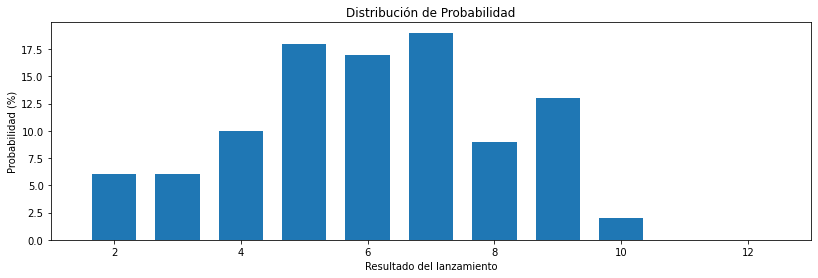

In [3]:
d=int(input("Ingresa el numero de lanzamientos (1-30000):")) # numero de lanzamientos

#if d>30000:
  #print("\N{Fire}"*3, "El n√∫mero elegido supera el rango establecido", "\N{Fire}"*3)


y=range(1,d+1,1)
z=[]
s=[]

for i in y:
 x = randint(1,6)
 x1= randint(1,6)
 z.append(x+x1)
 nz=np.array(z)

lanza=np.arange(1,13,1)

for i in range(1,13,1):
  conteo=z.count(i)
  s.append(conteo)
  ns=np.array(s)

plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
plt.xlim(1,13,1)
plt.bar(lanza,ns*100/d, width=0.7)
plt.title("Distribuci√≥n de Probabilidad")
plt.ylabel("Probabilidad (%)") 
plt.xlabel("Resultado del lanzamiento") 
print(f"Probabilidad resultado n√∫mero 7 despu√©s de {d} lanzamientos = {z.count(7)*100/d:.2f} %")

# **Actividad 2. Part√≠culas de gas en una caja**

Considere el siguiente ejemplo: La mezcla de dos vol√∫menes iguales de n part√≠culas indistinguibles de un gas ideal en un sistema aislado a temperatura y presi√≥n constantes (ver figura 1). 
<center>
 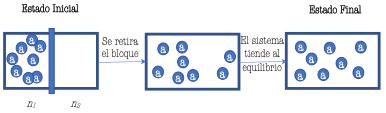
  </a>
  
  Figura 1. Mezcla irreversible de un gas ideal a T y P constantes. Adaptada de (levine, 1996).
</center>




<div align="justify">

El movimiento de las mol√©culas del gas es completamente aleatorio, y las mol√©culas no interaccionan entre s√≠. En el primer instante las part√≠culas estar√°n separadas por un bloque agrupadas al costado izquierdo de la caja, luego el bloque es retirado y las part√≠culas tendr√°n libertad de movimiento. Las part√≠culas solo tendr√°n dos opciones de localizaci√≥n: (i) el lado izquierdo de la caja ($\small n_1$) y (ii) el lado derecho de la caja  ($\small n_1$). Experimentalmente se observa que despu√©s un tiempo el sistema evoluciona de acuerdo a lo mostrado en la figura 1 (para una coja con $\small n=8$). 

Despu√©s de ver la figura 1 surgen dos inc√≥gnitas ¬øPor qu√© el estado final en la figura 1 es el estado de equilibrio y el estado inicial es un estado de no equilibrio? ¬øPor qu√© el paso del estado inicial sin mezclar al estado de mezclado (estado final) es irreversible?

**Simulaci√≥n**

En la siguiente celda de c√≥digo encontrar√°s una rutina que simula el comportamiento de las part√≠culas en una caja como la mostrada en la figura 1, podr√°s definir el numero part√≠culas que inicialmente se tiene a un lado de la caja y el numero de pasos de la simulaci√≥n (en nuestro caso representaran el tiempo que transcurre en la simulaci√≥n). <a href="https://play.google.com/store/books/details/Statistical_Thermodynamics_Fundamentals_and_Applic?id=BcCtAQAAQBAJ&gl=US"> (N. M. Laurendeau 2005)</a></div>

**Efecto del tiempo:**

(a) Fije en el numero total de part√≠culas de gas en 100. Fije el numero de pasos de la simulaci√≥n en 50 y corra la simulaci√≥n. Realice captura de pantalla de la curva obtenida. 

(b) Repita el paso anterior cambiando √∫nicamente el numero de pasos de la simulaci√≥n a 100, 200, 400 y 500. Realice captura de pantalla de las curvas obtenidas.

**Efecto del Numero part√≠culas:**

(c) Ahora, fije en el numero total de monedas, 500 monedas. Fije el numero de pasos de la simulaci√≥n en 50 y corra la simulaci√≥n. Realice captura de pantalla de la curva obtenida. 

(d) Repita el paso anterior cambiando √∫nicamente el numero de pasos de la simulaci√≥n a 100, 200, 400, 500, 1000 y 2000. Realice captura de pantalla de las curvas obtenidas.

**Con la informaci√≥n obtenida responda:**

(e) ¬øEl tiempo m√°ximo utilizado permiti√≥ que el sistema alcanzara el equilibrio? 

(f) ¬øConsidera que se requiere mas tiempo?
</d>

Ingrese el numero de part√≠culas de gas (1-1000) = 100
Ingrese el numero de steps de la simulaci√≥n (1-10000) = 10000
Source code: N. M. Laurendeau (2005)


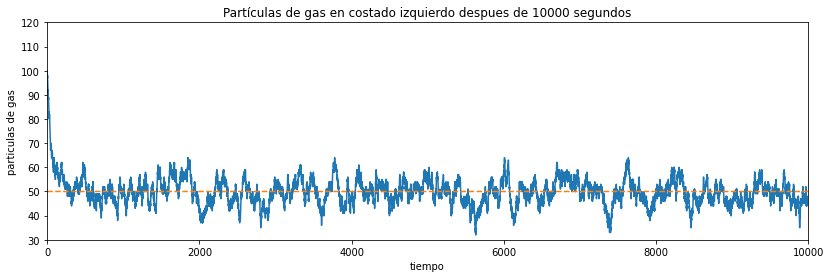

In [4]:
N=int(input("Ingrese el numero de part√≠culas de gas (1-1000) = "))
nstep=int(input("Ingrese el numero de steps de la simulaci√≥n (1-10000) = "))
n=zeros(nstep)
m=ones(nstep)*N/2
n[0]=N
for i in range(1,nstep):
  r=rand(1)
  if (r < n[i-1]/N ):
    n[i] = n[i-1] - 1
  else:
    n[i] = n[i-1] + 1

plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
plt.plot(range(0,nstep),n)
plt.plot(range(0,nstep),m,linestyle='dashed')
plt.xlabel('tiempo')
plt.ylim(0.3*N,N+0.2*N)
plt.xlim(0,nstep)
plt.ylabel('particulas de gas')
plt.title(f"Part√≠culas de gas en costado izquierdo despues de {nstep} segundos")
print("Source code: N. M. Laurendeau (2005)")

# **Actividad 3. Entrop√≠a**

<div align="justify">

La entrop√≠a de un sistema aislado es m√°xima en el equilibrio y desde el punto de vista macrosc√≥pico, un sistema en equilibrio se caracteriza por una distribuci√≥n (configuraci√≥n) de mayor probabilidad. El sistema avanza espont√°neamente a trav√©s de varios macroestados con valores crecientes de probabilidad hacia el macroestado con el mayor n√∫mero de configuraciones. La mec√°nica estad√≠stica esta relacionada con la probabilidad de diferentes estados energ√©ticos y la entrop√≠a estad√≠stica se define como:


$\small S=k_Bln\Omega$

Donde $\small k_B$ es la constante de Boltzman $\small 1,380649√ó10^{‚Äì23} J/K.$,  y  $\small \Omega$ representa el peso estad√≠stico (√≥ multiplicidad) que puede presentar el sistema. Se define como:


$\small \Omega =\frac{N!}{n_i!(N-n_i)!}$

Donde  ($\small N!$) representa el numero de todas las configuraciones (modos diferentes) de ordenar  ($\small N$) objetos diferentes (tambi√©n conocido como permutaciones de  ($\small N$)),  ($\small n_1!$) representa el numero de configuraciones diferentes (modos diferentes) de modo que produzcan el mismo macroestado para el objeto ($\small n_1$). 

***Calculo de la entrop√≠a: Efecto del Numero part√≠culas:***

En la siguiente actividad calcularemos la entrop√≠a del proceso redistribuci√≥n de las part√≠culas de gas mostrado en la figura 1. La rutina que se presenta en la siguiente celda de c√≥digo determina el valor de Omega cuando una part√≠cula de gas ha migrado del costado izquierdo de la caja al costado derecho. 

a) Fije en el numero total de part√≠culas de gas en 8 y corra la simulaci√≥n. Realice captura de pantalla de la curva obtenida. Verifique la informaci√≥n presentada en la tabla 1. b) Repita el paso anterior cambiando el numero total de part√≠culas de gas a 100, 250, 500 y 1000. Realice captura de pantalla de las curvas obtenidas. c) ¬øCual es el macroestado mas probable? d) Compare el valor de multiplicidad para el ensayo de 8 y 1000 part√≠culas de gas. e) Realice una discusi√≥n sobre las diferencias presentadas por las curvas obtenidas para cada ensayo. 

</div>

Ingrese el numero de part√≠culas de gas (1-1000) = 100


Text(4, 0, 'Entrop√≠a (J/K)')

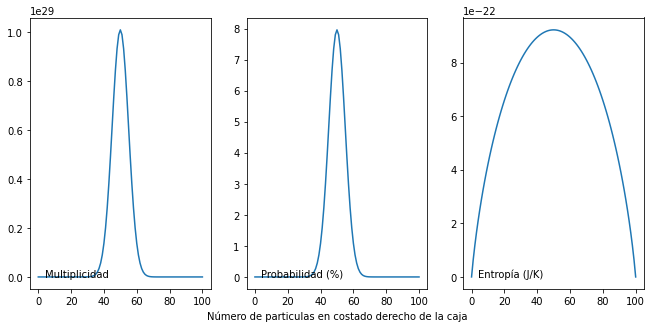

In [5]:
n=int(input("Ingrese el numero de part√≠culas de gas (1-1000) = "))
#n1=np.array([8,7,6,5,4,3,2,1,0])
k=np.arange(0,n+1,1)
KB=1.380649e-23 #J/K
C=comb(n,k)
s=sum(C)
S=KB*np.log(C)

plt.figure(figsize=(11,5))
plt.subplot(1,3,1)
plt.plot(k,C)
plt.annotate("Multiplicidad", xy=(4,0),
            xytext=(4,0))

plt.subplot(1,3,2)
plt.plot(k,C*100/s)
plt.xlabel("N√∫mero de particulas en costado derecho de la caja")
plt.annotate("Probabilidad (%)", xy=(4,0),
            xytext=(4,0))

plt.subplot(1,3,3)
plt.plot(k,S)
plt.annotate("Entrop√≠a (J/K)", xy=(4,0),
            xytext=(4,0))

#f=factorial(k)
#print(f"Combinaciones = {c}",f"Entrop√≠a = {S:.4}", sep="\n") 

---
#***3. Enlaces Recomendados***

*  `random` Mudule Numpy. <a href="https://docs.python.org/3.7/library/random.html">random ‚Äî Generate pseudo-random numbers4</a> 

*  `numpy.random` Mudule Numpy. <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html#random-sampling-numpy-random">imple random data</a> 

---
#***Referencias***

*  Levine, Ira N. Fisicoqu√≠mica. Mc Graw Hill, 4¬™ Ed. Madrid 1996. p. 114-121.
*  N. M. Laurendeau. Statistical Thermodynamics: Fundamementals and Aplications. Cambrige University Press. ISBN 978-0-511-14062-4. 2005.
---